In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Merging all 12 month sales data into 1 single file

In [3]:
#In this task there were 12 file and I have merged them into 1 file. Later I used that merged filed for analysis
'''path = 'drive/My Drive/Project'
files = [file for file in os.listdir(path)]

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv(path+'/'+file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_months_data.csv', index = False)'''

"path = 'drive/My Drive/Project'\nfiles = [file for file in os.listdir(path)]\n\nall_months_data = pd.DataFrame()\n\nfor file in files:\n  df = pd.read_csv(path+'/'+file)\n  all_months_data = pd.concat([all_months_data, df])\n\nall_months_data.to_csv('all_months_data.csv', index = False)"

Reading merged data

In [4]:
df = pd.read_csv('drive/My Drive/Project/all_months_data.csv')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


Question 1: What was the best month for sale? How much was earned that month

In [5]:
#Data cleaning
#df.isnull().sum()

df = df.dropna()

df = df[df['Order Date'] != 'Order Date']

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [6]:
#Converting Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [7]:
#Adding new Month column
df['Month'] = df['Order Date'].dt.strftime('%B')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",October
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",October
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",October
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",October
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",October


In [8]:
#Adding new Sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",October,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",October,389.99
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",October,5.98
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",October,149.99
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",October,11.99


In [9]:
#Finding an answer by using gropuby
result = df.groupby('Month').sum()

result

,Quantity Ordered,Price Each,Sales
Month,,,
April,20558,3367671.02,3390670.24
August,13448,2230345.42,2244467.88
December,28114,4588415.41,4613443.34
February,13449,2188884.72,2202022.42
January,10903,1811768.38,1822256.73
July,16072,2632539.56,2647775.76
June,15253,2562025.61,2577802.26
March,17005,2791207.83,2807100.38
May,18667,3135125.13,3152606.75


December had more sales with 4613443.34 USD

Question 2: What city had the highest number of sales

In [10]:
#Adding new column City
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",October,379.99,Dallas TX
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",October,389.99,Los Angeles CA
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",October,5.98,New York City NY
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",October,149.99,New York City NY
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",October,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001",January,109.99,Dallas TX
186846,150498,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016",January,149.99,San Francisco CA
186847,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035",January,999.99,Portland OR
186848,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001",January,5.98,Los Angeles CA


In [11]:
#Finding an answer by using gropuby
result2 = df.groupby('City').sum()

result2

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta GA,16602,2779908.20,2795498.58
Austin TX,11153,1809873.61,1819581.75
Boston MA,22528,3637409.77,3661642.01
Dallas TX,16730,2752627.82,2767975.40
Los Angeles CA,33289,5421435.23,5452570.80
New York City NY,27932,4635370.83,4664317.43
Portland ME,2750,447189.25,449758.27
Portland OR,11303,1860558.22,1870732.34
San Francisco CA,50239,8211461.74,8262203.91


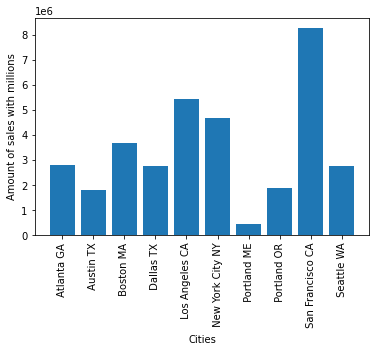

In [12]:
cities = df['City'].unique()

plt.bar(np.sort(cities), result2['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.xlabel('Cities')
plt.ylabel('Amount of sales with millions')
plt.show()

San Francisco CA had the most sales

Question 3: What time should we display advertisements to maximize likelihood *of* purchases

In [13]:
df_new = df.copy()

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  object        
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 14.2+ MB


In [14]:
df_new['Hour'] = df_new['Order Date'].dt.hour

In [15]:
#In the same time 2 or more products can be bought. So decided to duplicate the rows where the value of Quantity Ordered column is more than 1
df_new = df_new.loc[df.index.repeat(df_new['Quantity Ordered'])]

df_new.reset_index

<bound method DataFrame.reset_index of        Order ID                 Product  ...               City  Hour
0        259358  34in Ultrawide Monitor  ...          Dallas TX    10
1        259359  27in 4K Gaming Monitor  ...     Los Angeles CA    17
2        259360  AAA Batteries (4-pack)  ...   New York City NY    17
2        259360  AAA Batteries (4-pack)  ...   New York City NY    17
3        259361        27in FHD Monitor  ...   New York City NY    22
...         ...                     ...  ...                ...   ...
186846   150498        27in FHD Monitor  ...   San Francisco CA    22
186847   150499         ThinkPad Laptop  ...        Portland OR    14
186848   150500  AAA Batteries (4-pack)  ...     Los Angeles CA    14
186848   150500  AAA Batteries (4-pack)  ...     Los Angeles CA    14
186849   150501            Google Phone  ...          Boston MA    16

[209079 rows x 10 columns]>

In [16]:
result3 = df_new.groupby('Hour').count()

result3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,4428,4428,4428,4428,4428,4428,4428,4428,4428
1,2619,2619,2619,2619,2619,2619,2619,2619,2619
2,1398,1398,1398,1398,1398,1398,1398,1398,1398
3,928,928,928,928,928,928,928,928,928
4,937,937,937,937,937,937,937,937,937
5,1493,1493,1493,1493,1493,1493,1493,1493,1493
6,2810,2810,2810,2810,2810,2810,2810,2810,2810
7,4556,4556,4556,4556,4556,4556,4556,4556,4556
8,7002,7002,7002,7002,7002,7002,7002,7002,7002


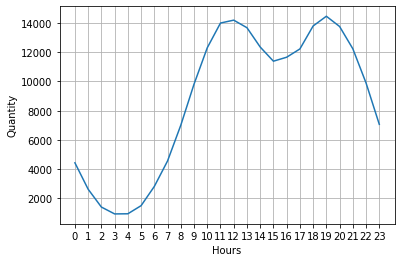

In [17]:
hours = df_new['Hour'].unique()

plt.plot(np.sort(hours), result3['Sales'])
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Quantity')
plt.show()

Best times would be around 9-11 and 17-19

Question 4: What products are most often sold together

In [18]:
#Finding duplicated orders and drop unnecessary columns
df_dup = df[df['Order ID'].duplicated(keep=False)]

df_dup = df_dup.drop(['Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address', 'Month', 'Sales', 'City'], axis=1)

In [19]:
#Finding products per each order ID

df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df_dup = df_dup[df_dup['Order ID'].duplicated(keep = 'last')]

df_dup = df_dup.drop(['Product'], axis=1)

df_dup

,Order ID,All Products
62,259420,"Google Phone, USB-C Charging Cable"
65,259422,"Google Phone, USB-C Charging Cable"
82,259438,"iPhone, Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor, ThinkPad Laptop"
123,259477,"LG Dryer, AAA Batteries (4-pack)"
...,...,...
186644,150303,"iPhone, Lightning Charging Cable"
186665,150323,"Google Phone, USB-C Charging Cable, Apple Airp..."
186666,150323,"Google Phone, USB-C Charging Cable, Apple Airp..."
186679,150335,"iPhone, Apple Airpods Headphones"


In [20]:
result4 = df_dup.groupby('All Products').count()

result4.sort_values('Order ID', ascending = False)

,Order ID
All Products,
"iPhone, Lightning Charging Cable",882
"Google Phone, USB-C Charging Cable",856
"iPhone, Wired Headphones",361
"Vareebadd Phone, USB-C Charging Cable",312
"Google Phone, Wired Headphones",303
...,...
"LG Dryer, 27in FHD Monitor",1
"LG Dryer, 27in 4K Gaming Monitor",1
"Vareebadd Phone, 27in 4K Gaming Monitor",1


iPhone and Lightning Charging Cable are most often sold together products

Question 5: What product sold the most?



In [21]:
result5 = df_new.groupby('Product').count()

result5.sort_values('Order ID', ascending = False)

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Product,,,,,,,,,
AAA Batteries (4-pack),31017,31017,31017,31017,31017,31017,31017,31017,31017
AA Batteries (4-pack),27635,27635,27635,27635,27635,27635,27635,27635,27635
USB-C Charging Cable,23975,23975,23975,23975,23975,23975,23975,23975,23975
Lightning Charging Cable,23217,23217,23217,23217,23217,23217,23217,23217,23217
Wired Headphones,20557,20557,20557,20557,20557,20557,20557,20557,20557
Apple Airpods Headphones,15661,15661,15661,15661,15661,15661,15661,15661,15661
Bose SoundSport Headphones,13457,13457,13457,13457,13457,13457,13457,13457,13457
27in FHD Monitor,7550,7550,7550,7550,7550,7550,7550,7550,7550
iPhone,6849,6849,6849,6849,6849,6849,6849,6849,6849


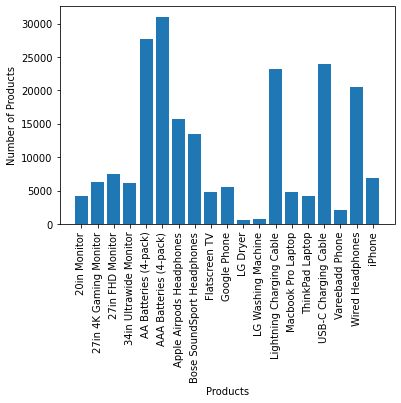

In [22]:
products = df['Product'].unique()

plt.bar(np.sort(products), result5['Sales'])
plt.xticks(products, rotation = 'vertical')
plt.xlabel('Products')
plt.ylabel('Number of Products')
plt.show()

AAA Batteries (4-pack) are sold more than others